https://www.kaggle.com/code/niramay/kmeans-clustering-wikipedia-articles

**Using Wikipedia Api**

Cluster Similar Articles

Reccomender System

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=72d416815de3803881de3f5672d7c869621980dd35247605d04d750f834e7fa9
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [2]:
import numpy as np
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
articles = ['Field Hockey','Football','Baseball', 'Spotify', 'apple music', 'youtube music','fudge', 'ice cream','chocolate','instagram', 'social media','facebook']

In [6]:
articles = [
    "Artificial Intelligence",
    "Machine Learning",
    "Deep Learning",
    "Data Science",
    "Statistics",
    "Neural Network",
    "Cloud Computing",
    "Big Data",
    "Reinforcement Learning",
    "Computer Vision"
]

In [11]:
wikis = []
titles = []

for article in articles:
    try:
        article_content = wikipedia.page(article, auto_suggest=False).content
        wikis.append(article_content)
        titles.append(article)
    except wikipedia.exceptions.PageError as e:
        print(f"Could not find Wikipedia page for '{article}': {e}")
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation error for '{article}': {e}")
        try:
            # Try to find a better match
            search_results = wikipedia.search(article)
            if search_results:
                print(f"Attempting to use the first search result for '{article}': '{search_results[0]}'")
                article_content = wikipedia.page(search_results[0], auto_suggest=False).content
                wikis.append(article_content)
                titles.append(search_results[0])
            else:
                print(f"No search results found for '{article}'. Skipping.")
        except Exception as search_e:
            print(f"An error occurred while trying to search and retrieve content for '{article}': {search_e}")
    except Exception as e:
        print(f"An unexpected error occurred for '{article}': {e}")

print(titles)
print(len(wikis))

['Artificial Intelligence', 'Machine Learning', 'Deep Learning', 'Data Science', 'Statistics', 'Neural Network', 'Cloud Computing', 'Big Data', 'Reinforcement Learning', 'Computer Vision']
10


In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorized = vectorizer.fit_transform(wikis)

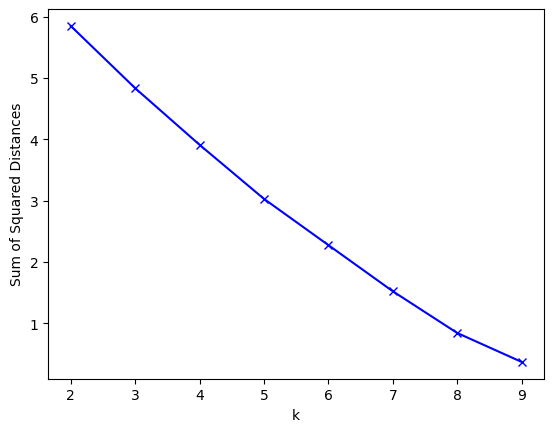

In [12]:
dSqSum = []

for k in range(2,10):
   kmeans = KMeans(n_clusters=k, max_iter=200, n_init=10)
   kmmeans = kmeans.fit(vectorized)
   dSqSum.append(kmeans.inertia_)

plt.plot(range(2,10), dSqSum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [13]:
optimal_k = 6
kMeansModel = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, n_init=10)
kMeansModel.fit(vectorized)
labels=kMeansModel.labels_
clusterDF=pd.DataFrame({"Title" : titles, "Cluster" : labels})
clusterDF = clusterDF.sort_values('Cluster')
clusterDF

,Title,Cluster
3,Data Science,0
4,Statistics,0
7,Big Data,0
0,Artificial Intelligence,1
2,Deep Learning,1
1,Machine Learning,1
9,Computer Vision,2
8,Reinforcement Learning,3
6,Cloud Computing,4
5,Neural Network,5


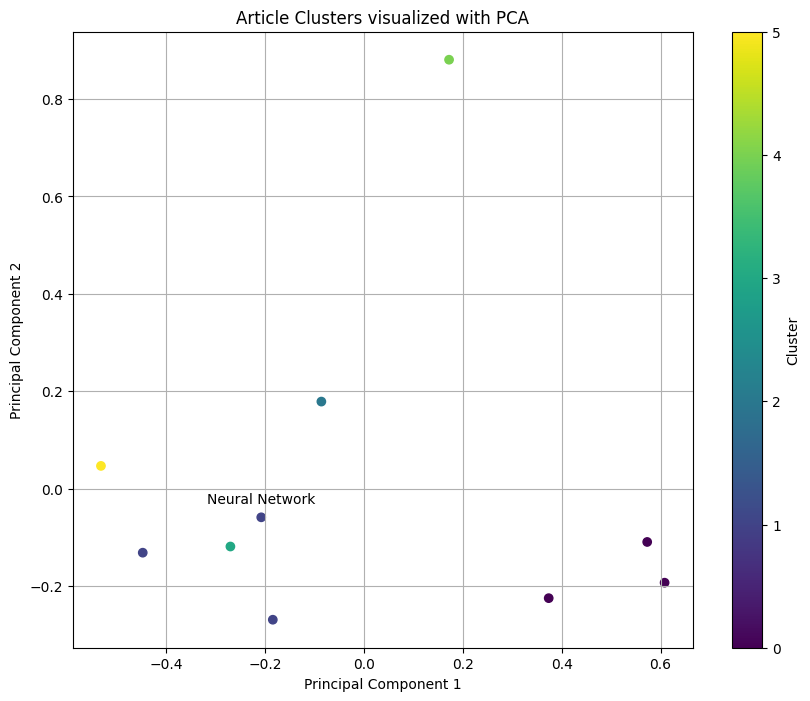

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectorized.toarray()) # Convert sparse matrix to dense array

# Create a DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=pca_df['Cluster'], cmap='viridis')

# Add titles to the points
for i, title in enumerate(titles):
    plt.annotate(title, (pca_df['principal component 1'][i], pca_df['principal component 2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Article Clusters visualized with PCA')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

Cluster: 0
Titles
Data Science
  Statistics
    Big Data


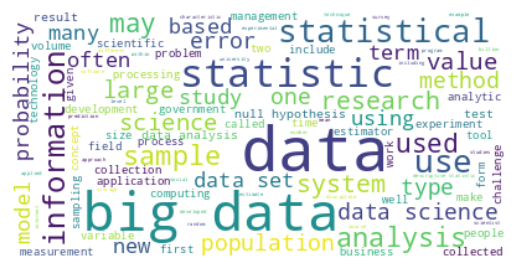

Cluster: 1
Titles
Artificial Intelligence
          Deep Learning
       Machine Learning


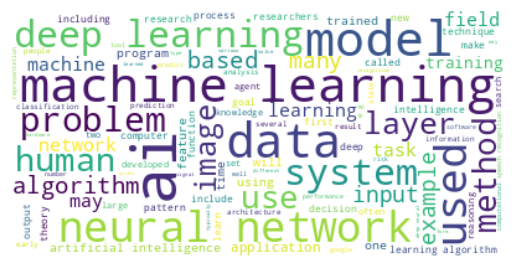

Cluster: 2
Titles
Computer Vision


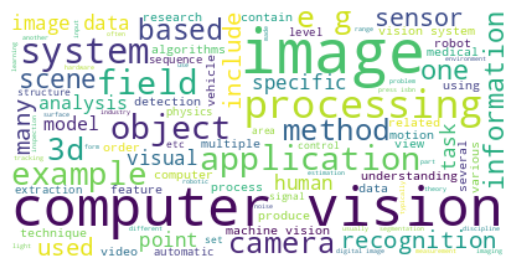

Cluster: 3
Titles
Reinforcement Learning


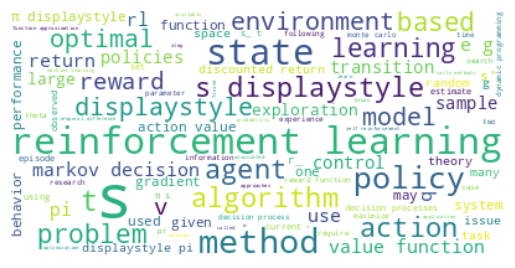

Cluster: 4
Titles
Cloud Computing


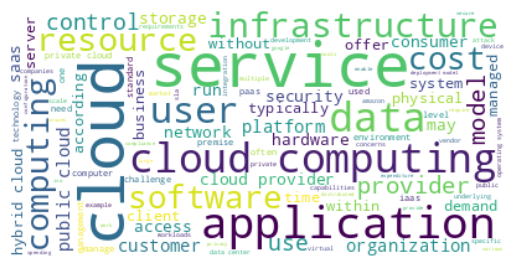

Cluster: 5
Titles
Neural Network


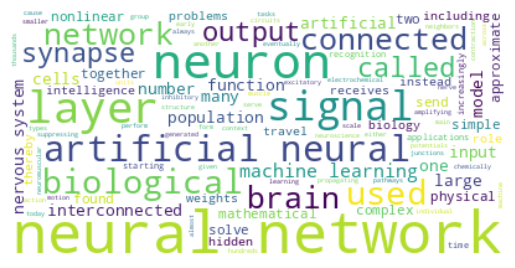

In [14]:
articles_data={'Cluster':labels,'wiki':wikis}
articles_df=pd.DataFrame(articles_data)

for k in range(0,optimal_k):
   s=articles_df[articles_df['Cluster']==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])

   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=clusterDF[clusterDF['Cluster']==k]['Title']
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

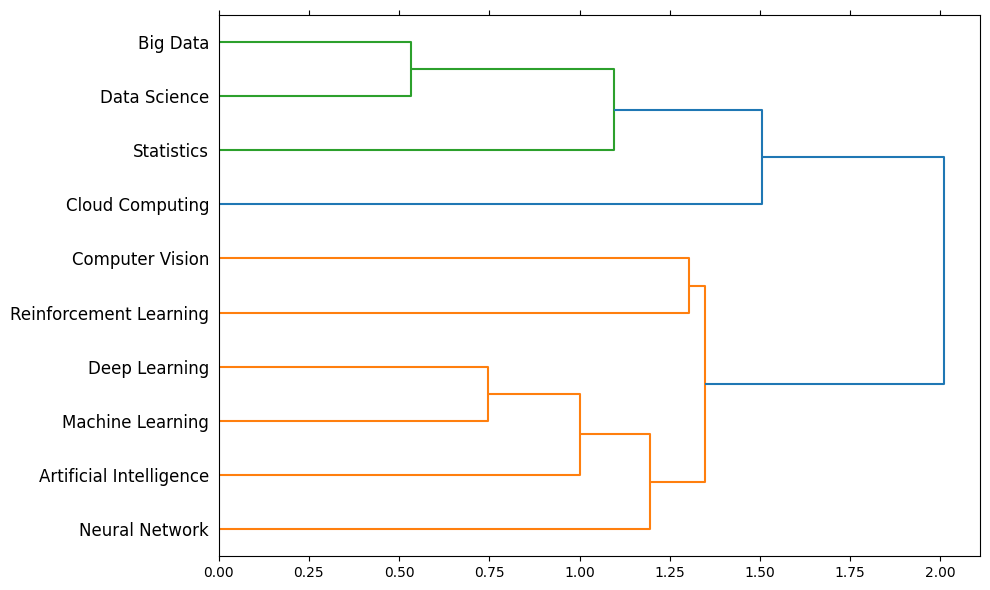

In [15]:
clustering = AgglomerativeClustering().fit(vectorized.toarray())
clustering.labels_
dist = 1 - cosine_similarity(vectorized)
linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(10, 6))
ax = dendrogram(linkage_matrix, orientation="right", labels=articles);

plt.tick_params(axis= 'x',which='both',bottom='off',top='off',labelbottom='off')
plt.tight_layout()

### Reccomender System

In [39]:
# Example: Wikipedia articles about famous people from Kaggle
url = "https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json"
data = pd.read_json(url)

# Dataset structure
print("Dataset shape:", data.shape)
print(data.head())

# ---------------------------
# STEP 2: TF-IDF Vectorization
# ---------------------------
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tfidf = vectorizer.fit_transform(data['content'])

print("TF-IDF matrix shape:", tfidf.shape)

Dataset shape: (11314, 3)
                                             content  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   

            target_names  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space  
TF-IDF matrix shape: (11314, 129791)


In [40]:
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Import pandas

# Initialize and fit the NMF model to the vectorized TF-IDF features
# NMF reduces the dimensionality of the features while preserving important information
nmf = NMF(n_components=20, random_state=42)
nmf_features = nmf.fit_transform(tfidf) # Use tfidf instead of vectorized

print("NMF Features shape:", nmf_features.shape)

# Get the list of article titles from the data DataFrame
article_titles = data['target_names'].tolist()
print(article_titles)

# Define a function to recommend articles based on cosine similarity of NMF features
def recommend_articles(title, n=5):
    """
    Recommends similar articles based on NMF features and cosine similarity.

    Args:
        title (str): The title of the article for which to find recommendations.
        n (int): The number of recommendations to return.

    Returns:
        list: A list of tuples, where each tuple contains the title of a
              recommended article and its similarity score.
              Returns an error message string if the article is not found.
    """
    # Find the index of the input article title
    try:
        idx = article_titles.index(title)
    except ValueError:
        return f"Article '{title}' not found in the list."

    # Get the NMF features for the input article
    input_article_features = nmf_features[idx:idx+1]

    # Calculate cosine similarity between the input article and all other articles
    similarities = cosine_similarity(input_article_features, nmf_features).flatten()

    # Create a pandas Series of similarity scores, indexed by article titles
    similarity_series = pd.Series(similarities, index=article_titles)

    # Sort the similarity scores in descending order and get the top n
    # Exclude the article itself (the most similar)
    recommended_articles_series = similarity_series.sort_values(ascending=False)[1:n+1]

    # Create a list of recommendations with titles and similarity scores
    recs = list(recommended_articles_series.items())

    return recs

# ---------------------------
# Test the recommender system
# ---------------------------
# Get the title of the first article as a sample input
sample_title = "NASA Discovers New Planet" # Using a title not in the list to test error handling
print(f"\nRecommendations for: {sample_title}")

# Get and print the top 5 recommendations for the sample article
recommendations = recommend_articles(sample_title, n=5)

if isinstance(recommendations, str):
    print(recommendations)
else:
    for rec_title, score in recommendations:
        print(f"{rec_title} (Similarity: {score:.3f})")

# Test with a title that is in the list
sample_title_in_list = article_titles[50]
print(f"\nRecommendations for: {sample_title_in_list}")
recommendations_in_list = recommend_articles(sample_title_in_list, n=5)

if isinstance(recommendations_in_list, str):
    print(recommendations_in_list)
else:
    for rec_title, score in recommendations_in_list:
        print(f"{rec_title} (Similarity: {score:.3f})")

NMF Features shape: (11314, 20)
['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'rec.motorcycles', 'talk.religion.misc', 'comp.sys.mac.hardware', 'sci.space', 'misc.forsale', 'alt.atheism', 'comp.graphics', 'rec.autos', 'sci.electronics', 'comp.windows.x', 'alt.atheism', 'rec.sport.hockey', 'misc.forsale', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.electronics', 'rec.sport.baseball', 'soc.religion.christian', 'rec.autos', 'misc.forsale', 'sci.med', 'sci.electronics', 'talk.politics.mideast', 'talk.politics.misc', 'rec.sport.hockey', 'rec.motorcycles', 'sci.crypt', 'rec.motorcycles', 'talk.politics.guns', 'rec.sport.baseball', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'rec.sport.baseball', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'rec.motorcycles', 'sci.elect

In [20]:
# Create a DataFrame with article titles and TF-IDF features
data = pd.DataFrame({'title': articles})
data['features'] = list(vectorized.toarray())